In [1]:
#1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

In [3]:

data = pd.DataFrame({
    "French":[150.1, 176.4, 113.9, 199.5, 155.7],
    "English":[134.8, 164.3, 125.8, 172.4, 190.2]
})

n = data.shape[0]
data

,French,English
0,150.1,134.8
1,176.4,164.3
2,113.9,125.8
3,199.5,172.4
4,155.7,190.2


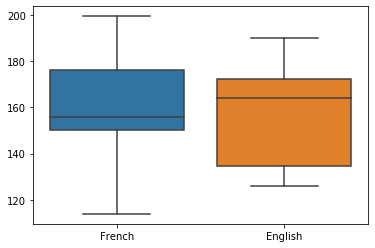

In [5]:
#2. Побудувати графік, що відображає розкид даних в групах.
sns.boxplot(data=data)

In [6]:
#3. для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції,
#значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).
def func_of_Pirson(data):
    r = 0
    first = n*(sum(data.iloc[:,0]*data.iloc[:,1]))-(sum(data.iloc[:,0])*sum(data.iloc[:,1]))
    second = sqrt((n*sum(data.iloc[:,0]**2)-sum(data.iloc[:,0])**2)*(n*sum(data.iloc[:,1]**2)-sum(data.iloc[:,1])**2))
    
    r = first/second
    df = data.shape[0]-2
    c = pd.read_excel("C:/Users/Zamri Zortog/Desktop/laba6/Таблиця критичних значень кореляційного аналізу.xlsx").iloc[df-1, 1]
    
    print("Значення коефіцієнта кореляції: ", r)
    print("Число ступенів свободи: ", df)
    
    znach = ""
    
    if r > c:
        print("Significant: " + str(r)+"(дано)" + " > "+ str(c)+"(табличне)")
        znach = "significant"
    else:
        print("Not significant: "+ str(r)+"(дано)" + " < "+ str(c)+"(табличне)")
        znach = "not significant"
    
    ans = [r, df, znach]
    return ans

In [7]:
#4. для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості 
#зв'зку (significant або not significant).
def Students(data):
    data['Різниця(d)'] = None
    for i in range(data.shape[0]):
        if data.iloc[i,0] == 0 or data.iloc[i,1] == 0:
            data['Різниця(d)'][i] = 0;
        else:
            data['Різниця(d)'][i] = (data.iloc[i,0] - data.iloc[i,1])
    Md = sum(data.iloc[:,2])/n
    sum_d = 0
    for i in range(n):
        sum_d += (data.iloc[i, 2] - Md)**2
    sigmaD = sqrt(sum_d/n)
    
    t = (Md/sigmaD) * sqrt(n)
    df = data.shape[0] - 1
    c = pd.read_excel("C:/Users/Zamri Zortog/Desktop/laba6/Таблица критических значений для парного критерия.xlsx").iloc[df-1, 1]
    print("Значення t-критерію Стьюдента: ", t)
    print("Число ступенів свободи: ", df)
    
    znach = ""
    
    if t > c:
        print("Significant: " + str(t)+"(Дано)" + " > "+ str(c)+"(Табличне)")
        znach = "significant"
    else:
        print("Not significant: "+ str(t)+"(Дано)" + " < "+ str(c)+"(Табличне)")
        znach = "not significant"
    
    ans = [t, df, znach]
    return ans

In [8]:
#5. Перевірити розбіжність на між групами на даних з п. 1.
func_of_Pirson(data)
print("\n-----------------------------------------------\n")
Students(data)

Значення коефіцієнта кореляції:  0.6586810626458954
Число ступенів свободи:  3
Not significant: 0.6586810626458954(дано) < 0.8783(табличне)

-----------------------------------------------

Значення t-критерію Стьюдента:  0.1641935669430884
Число ступенів свободи:  4
Not significant: 0.1641935669430884(Дано) < 2.776(Табличне)


C:\Users\Zamri Zortog\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[0.1641935669430884, 4, 'not significant']

In [10]:
#6. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.
#Виходячи з порівняння по критерію Пірсона, можна  зробити висновок, що звязок в групах  слабкий,
#про це говорить отриманий  коефіціент (0.6586810626458954)
#Виходяч з порівнянням по критерію Стюдента, можна зробити висновок, що приймається гіпотеза про різницю в средніх